<a href="https://colab.research.google.com/github/carlossawyerr/House-Price-Prediction/blob/master/Housing_Price_Prediction_Feed_Forward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Feed Forward Neural Network**

In [114]:
!pip install tensorflow==1.12.0

    100% |████████████████████████████████| 83.1MB 381kB/s 
  Found existing installation: tensorflow 1.13.0rc1
    Uninstalling tensorflow-1.13.0rc1:
      Successfully uninstalled tensorflow-1.13.0rc1


In [13]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras.layers import  Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

import pandas as pd
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)
print(keras.__version__)

1.13.0-rc1
2.2.4-tf


In [0]:
#import data
data = keras.datasets.boston_housing.load_data()

In [0]:
#After data exploration, create proper variables for Dataset
(train_features, train_labels), (test_features, test_labels) = data

In [0]:
#Get summary statistics for the training set to normalize by

train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean)/train_std

In [0]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(len(train_features[0]),)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [0]:
#Build the Model
def build_model():
    model = keras.Sequential([
        Dense(20, input_shape=(13,1)),
        Activation('relu'),
        Dense(1),
        Activation('softmax'),
    ])

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model


In [27]:
#Run the Model
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end ='')

#model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................................................................................................
Final Root Mean Square Error on validation set: 2.343


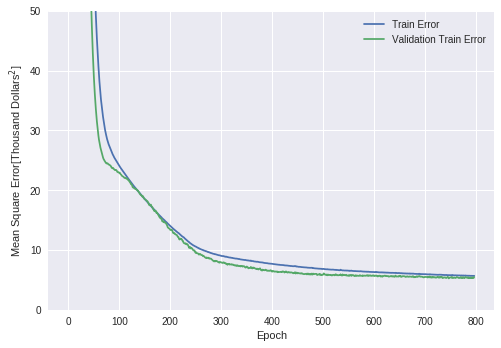

In [43]:
def plot_history():
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error[Thousand Dollars$^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')  
  plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Validation Train Error')  
  plt.legend()
  plt.ylim([0,50])
plot_history()

In [46]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('MSE on test set : {}'.format(round(rmse,3)))

102/102 [==============================] - 0s 89us/step
MSE on test set : 3.97


In [0]:
#revert to default versions
!kill -9 -1